In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray

from typing import Callable
from typing import List

In [2]:
def square(x: ndarray) -> ndarray:
    """
    Возведение в квадрат каждого элемента объекта x
    :param x: [1 2 3]
    :return: [1 4 9]
    """
    return np.power(x, 2)
def leaky_relu(x: ndarray) -> ndarray:
    """
    Применение функции "Leaky ReLU" к каждому элементу x
    :param x:
    :return:
    """
    return np.maximum(0.2 * x, x)
def sigmoid(x: ndarray) -> ndarray:
    """
    Применение сигмоидной функции к каждому элементу объекта ndarray
    :param x:
    :return:
    """
    return 1 / (1 + np.exp(-x))

In [3]:
def deriv(func:Callable[[ndarray], ndarray],
          input_: ndarray,
          delta: float = 0.00001) -> ndarray:
    """
    Вычисление производной функции func в каждом элементе массива input_
    :param func:
    :param input_:
    :param delta:
    :return:
    """
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

In [4]:
# Определяем типы аргументов функции и тип возвращаемого объекта
# Функция типа Array_Function принимает массив (Array) ndarray и возвращает ndarray
Array_Function = Callable[[ndarray], ndarray]
# Список функций, каждая из которых Array_Function
Chain = List[Array_Function]

In [5]:
def chain_length_2(chain: Chain,
                   input_: ndarray) -> ndarray:
    """
    Вычисляет подряд значение двух функций в объекте "Chain"
    :param chain:
    :param input_:
    :return:
    """
    assert len(chain) == 2, \
    "Длина объекта chain должна быть равна 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(input_))
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    """
    Вычисление производной двух вложенных функций:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x) с помощью цепного правила
    :param chain:
    :param input_range:
    :return:
    """
    assert len(chain) == 2, \
    "Для этой функции нужны объекты Chain длиной 2"

    assert input_range.ndim == 1, \
    "Число измерений (осей) входных данных функции задает 1-мерный объект ndarray"

    f1 = chain[0]
    f2 = chain[1]

    #f1(x)
    f1_of_x = f1(input_range)

    #df1/du
    df1dx = deriv(f1, input_range)

    #df2/du(f1(x))
    df2du = deriv(f2, f1_of_x)

    # Поэлементно перемножаем полученные значения
    return df2du * df1dx

In [6]:
def chain_length_3(chain: Chain,
                   input_: ndarray) -> ndarray:
    """
    Считает результат трех вложенных функций
    :param chain:
    :param input_:
    :return:
    """
    assert len(chain) == 3, \
    "Длина цепочки должна быть 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(input_)))
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    """
    Вычисление производной трех вложенных функций:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x) с помощью цепного правила
    :param chain:
    :param input_range:
    :return:
    """

    assert len(chain) == 3, \
    "Для этой функции нужны объекты 'chain' длиной 3"
    f1 =chain[0]
    f2 =chain[1]
    f3 =chain[2]

    f1_of_x = f1(input_range)
    f2_of_x = f2(f1_of_x)

    df3du = deriv(f3, f2_of_x)
    df2du = deriv(f2, f1_of_x)
    df1dx = deriv(f1, input_range)

    # Поэлементно перемножаем полученные значения
    return df3du * df2du * df1dx

In [7]:
def plot_chain(ax,
               chain: Chain,
               input_range: ndarray) -> None:
    """
    Строит цепную функцию
    :param ax: matplotlib Subplot for plotting
    :param chain:
    :param input_tange:
    :return:
    """
    assert  input_range.ndim == 1, \
        "Число измерений (осей) входных данных функции задает 1-мерный объект ndarray"
    if len(chain) == 2:
        func_ = chain_length_2
    elif len(chain) == 3:
        func_ = chain_length_3
    else:
        func_ = None
    output_range = func_(chain, input_range)
    ax.plot(input_range, output_range)
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> None:
    """
    Использует цепное правило для построения произвдной функции, состоящей из двух вложенных функций
    :param ax:
    :param chain:
    :param input_range:
    :return:
    """

    if len(chain) == 2:
        func_ = chain_deriv_2
    elif len(chain) == 3:
        func_ = chain_deriv_3
    else:
        func_ = None
    output_range = func_(chain, input_range)
    ax.plot(input_range, output_range)

Text(0.5, 1.0, 'Array_Function and derivative for\n$f(x)=square(sigmoid(x))$')

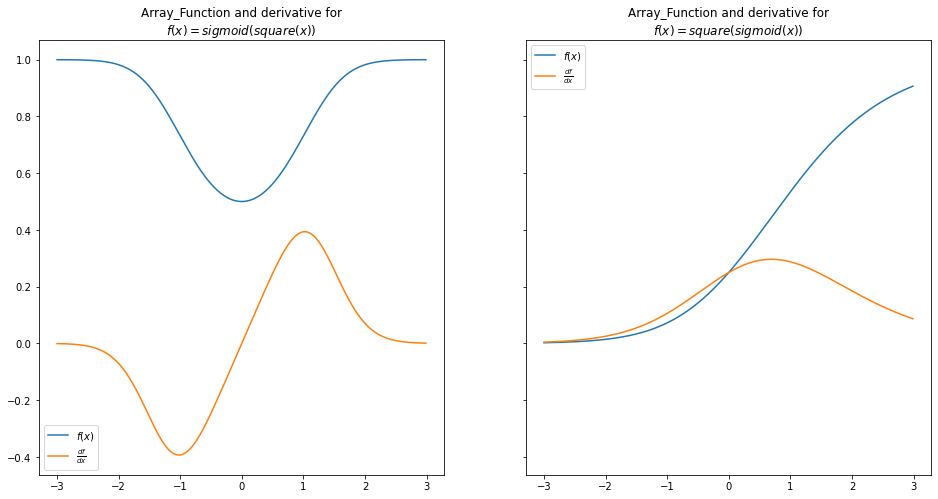

In [8]:
# sharey - совместное использование свойств между осями
fig, ax = plt.subplots(1, 2, sharey='all', figsize=(16,8))
PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

# Запись в виде дроби
ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Array_Function and derivative for\n$f(x)=sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)

ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Array_Function and derivative for\n$f(x)=square(sigmoid(x))$")

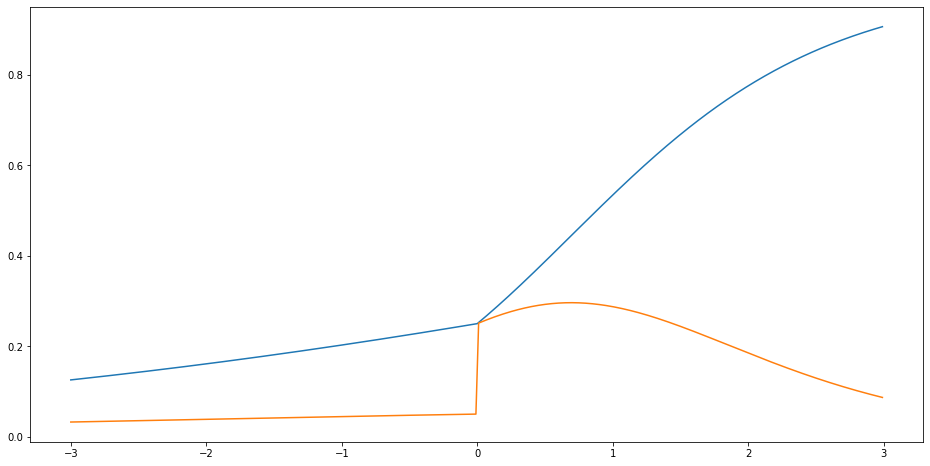

In [9]:
fig, ax = plt.subplots(1, 1, sharey='all', figsize=(16,8))

chain_3 = [leaky_relu, sigmoid, square]
plot_chain(ax, chain_3, PLOT_RANGE)
plot_chain_deriv(ax, chain_3, PLOT_RANGE)

In [10]:
def multiple_inputs_add(x: ndarray,
                        y: ndarray,
                        sigma: Array_Function) -> float:
    """
    Функция сложения двух переменных, прямой проход
    :param x:
    :param y:
    :param sigma:
    :return:
    """
    assert x.shape == y.shape
    a = x + y
    return sigma(a)

In [11]:
def multiple_input_add_backward(x: ndarray,
                                y: ndarray,
                                sigma: Array_Function) -> float:
    """
    Вычисление производной функции сложения
    по обеим переменным
    :param x:
    :param y:
    :param sigma:
    :return:
    """
    # "Прямой проход"
    a = x + y
    # Вычисление производных
    dsda = deriv(sigma, a)

    dadx, dady = 1, 1

    return dsda * dadx, dsda * dady

def multiple_input_multiply_backward(x: ndarray,
                                     y: ndarray,
                                     sigma: Array_Function) -> float:
    """
    Вычисление производной функции умножения
    по обеим переменным
    :param x:
    :param y:
    :param sigma:
    :return:
    """
    # Прямой проход
    a = x * y
    # Вычисление производных
    dsda = deriv(sigma, a)

    dadx, dady = y, x

    return dsda * dadx, dsda * dady

In [12]:
def matmul_forward(X: ndarray,
                   W: ndarray) -> ndarray:
    """
    Прямой проход при умножении матриц
    :param X:
    :param W:
    :return:
    """
    assert X.shape[1] == W.shape[0], \
    "Число столбцов X ({0}) должно совпадать c" \
    "числом строк W ({1})".format(X.shape[1], W.shape[0])

    # Умножение матриц
    return np.dot(X, W)

def matmul_backward_first(X: ndarray,
                          W: ndarray) -> ndarray:
    """
    Обратный проход для операции умножения матриц по первому аргументу
    :param X:
    :param W:
    :return:
    """
    # обратный проход
    dNdX = np.transpose(W, (1, 0))

    return  dNdX

In [13]:
np.random.seed(190203)
X = np.random.randn(1, 3)
W = np.random.randn(3, 1)

print(X)
print(W)
matmul_backward_first(X, W)

[[ 0.47231121  0.61514271 -1.72622715]]
[[ 0.92819676]
 [-0.60754888]
 [-1.22136052]]


array([[ 0.92819676, -0.60754888, -1.22136052]])

In [14]:
def matrix_forward_extra(X: ndarray,
                         W: ndarray,
                         sigma: Array_Function) -> ndarray:
    """
    Вычисление функции, в которой результат умножения матриц
    передается в следующую функцию
    :param X:
    :param W:
    :param sigma:
    :return:
    """
    assert X.shape[1] == W.shape[0]

    N = np.dot(X, W)
    S = sigma(N)
    return S

def matrix_function_backward_1(X: ndarray,
                               W: ndarray,
                               sigma: Array_Function) -> ndarray:
    """
    Вычисление частной производной функции по первому аргументу
    :param X:
    :param W:
    :param sigma:
    :return:
    """
    assert X.shape[1] == W.shape[0]

    # уножение матриц
    N = np.dot(X, W)

    # передача результата умножения матриц в функцию сигма
    S = sigma(N)

    # обратный проход
    dSdN = deriv(sigma, N)

    # Замена осей 1 и 0
    dNdX = np.transpose(W, (1, 0))
    # Порядок множителей не имеет значение, т.к. dNdX (1x1)
    return np.dot(dSdN, dNdX)

In [15]:
# Проверка моим кодом
check1 = matrix_function_backward_1(X, W, sigmoid)
num = 0.01
X[0, 2] += num
check2 = matrix_function_backward_1(X, W, sigmoid)

# Если значения близки, то цепное правило работает
print(check2[0][2] - check1[0][2])
print(num * check1[0][2])

-0.0010927177765746587
-0.0011206626186825695


In [16]:
# Проверка их кодом
def forward_test(ind1, ind2, inc):
    X1 = X.copy()
    X1[ind1, ind2] = X[ind1, ind2] + inc

    return matrix_forward_extra(X1, W, sigmoid)

In [17]:
print((np.round(forward_test(0, 2, 0.01) - forward_test(0, 2, 0), 4)) / 0.01)
print(np.round(matrix_function_backward_1(X, W, sigmoid)[0, 2], 2))

[[-0.11]]
-0.11


In [18]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function) -> float:
    """
    Прямой проход функции объектов ndarray X, W и функции sigma
    :param X:
    :param W:
    :param sigma:
    :return:
    """
    assert X.shape[1] == W.shape[0]

    # умножение матриц
    N = np.dot(X, W)

    # передача результата умножения матриц в функцию сигма
    S = sigma(N)

    # сумма всех элементов
    L = np.sum(S)

    return L

In [19]:
def matrix_function_backward_sum_1(X: ndarray,
                                   W: ndarray,
                                   sigma: Array_Function) -> ndarray:
    """
    Вычисление производной функции по первому матричному аргументу
    :param X:
    :param W:
    :param sigma:
    :return:
    """
    assert X.shape[1] == W.shape[0]

    # умножение матриц
    N = np.dot(X, W)

    # передача результата умножения матриц в функцию сигма
    S = sigma(N)

    # суммирование всех элементов
    L = np.sum(S)

    # матрица из единиц такого же размера и такой же формы как S
    dLdS = np.ones_like(S)

    dSdN = deriv(sigma, N)

    dNdX = np.transpose(W, (1, 0))

    dLdX = np.dot(dSdN, dNdX)

    return dLdX

In [20]:
# CHECK
np.random.seed(190204)
X = np.random.randn(3, 3)
W = np.random.randn(3, 2)

print("X:")
print(X)
print("L:")
print(round(matrix_function_forward_sum(X, W, sigmoid), 4))
print()
print("dLdX:")
dLdX = matrix_function_backward_sum_1(X, W, sigmoid)
print(dLdX)

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]
L:
2.3755

dLdX:
[[ 0.24888872 -0.3747806   0.01121963]
 [ 0.12604152 -0.27807406 -0.13945839]
 [ 0.229928   -0.36623446 -0.02252593]]


In [21]:
X1 = X.copy()
num = 0.001
X1[0, 0] += num

print(round(
    (matrix_function_forward_sum(X1, W, sigmoid) -
     matrix_function_forward_sum(X, W, sigmoid)) / num,
    4))

0.2489


In [22]:
def matrix_function_forward_sum(X: ndarray,
                                W: ndarray,
                                sigma: Array_Function,
                                modify_x11: bool = False,
                                x11: float = 0.5) -> float:
    """
    Вчисление результата прямого прохода на этой функциис
    входными тензорами X и W и функцией sigma
    :param X:
    :param W:
    :param sigma:
    :param modify_x11:
    :param x11:
    :return:
    """
    assert X.shape[1] == W.shape[0]

    if modify_x11:
        X1 = X.copy()
        X1[0][0] = x11
    N = np.dot(X1, W)

    S= sigma(N)

    L = np.sum(S)
    return L

In [23]:
print("X:")
print(X)

X:
[[-1.57752816 -0.6664228   0.63910406]
 [-0.56152218  0.73729959 -1.42307821]
 [-1.44348429 -0.39128029  0.1539322 ]]


Text(0, 0.5, '$L$')

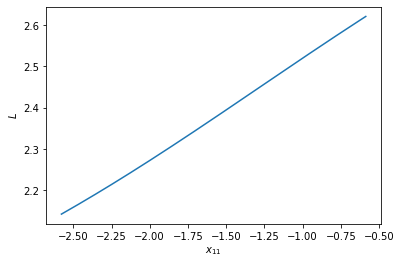

In [24]:
x11s = np.arange(X[0][0] - 1, X[0][0] + 1, 0.01)
Ls = [matrix_function_forward_sum(X, W, sigmoid,
                                  modify_x11=True,
                                  x11=x11) for x11 in x11s]
plt.plot(x11s, Ls)
plt.xlabel("$x_{11}$")
plt.ylabel("$L$")


In [25]:
print("Угол наклона должен быть примерно", dLdX[0][0])

Угол наклона должен быть примерно 0.24888871824552924
